In [4]:
import json, gzip
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

file = "Home_and_Kitchen.jsonl.gz"
with gzip.open(file, "rt", encoding="utf-8") as fp:
    for line in fp:
        obj = json.loads(line)
        print(obj)
        break

{'rating': 1.0, 'title': 'Received Used & scratched item! Purchased new!', 'text': 'Livid.  Once again received an obviously used item that has food on it & scratches. I purchased this new!!  Pics not loading rn. Will add them later. Disgusted.', 'images': [], 'asin': 'B007WQ9YNO', 'parent_asin': 'B09XWYG6X1', 'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ', 'timestamp': 1677373409298, 'helpful_vote': 1, 'verified_purchase': True}


Part 2: Exploratory Data Analysis

In [7]:
reviews = []
with gzip.open(file, "rt", encoding="utf-8") as fp:
    for i, line in enumerate(fp):
        reviews.append(json.loads(line))
        if i >= 5000000:
            break

df = pd.DataFrame(reviews)
df.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Received Used & scratched item! Purchased new!,Livid. Once again received an obviously used ...,[],B007WQ9YNO,B09XWYG6X1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677373409298,1,True
1,5.0,Excellent for moving & storage & floods!,I purchased these for multiple reasons. The ma...,[],B09H2VJW6K,B0BXDLF8TW,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1672043410846,0,True
2,2.0,Lid very loose- needs a gasket imo. Small base.,[[VIDEOID:c87e962bc893a948856b0f1b285ce6cc]] I...,[{'small_image_url': 'https://m.media-amazon.c...,B07RL297VR,B09G2PW8ZG,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1653447296788,0,True
3,5.0,Best purchase ever!,If you live at a higher elevation like me (5k ...,[{'small_image_url': 'https://m.media-amazon.c...,B09CQF4SWV,B08CSZDXZY,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1651855096178,0,True
4,5.0,Excellent for yarn!,I use these to store yarn. They easily hold 12...,[{'small_image_url': 'https://images-na.ssl-im...,B003U6A3EY,B0C6V27S6N,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1589934525940,1,True


In [9]:
print(f"Loaded {len(df):,} reviews")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nRating distribution:")
print(df['rating'].value_counts().sort_index())

Loaded 5,000,001 reviews

Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']

Data types:
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object

Missing values:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

Rating distribution:
rating
1.0     361660
2.0     219631
3.0     355427
4.0     628002
5.0    3435281
Name: count, dtype: int64


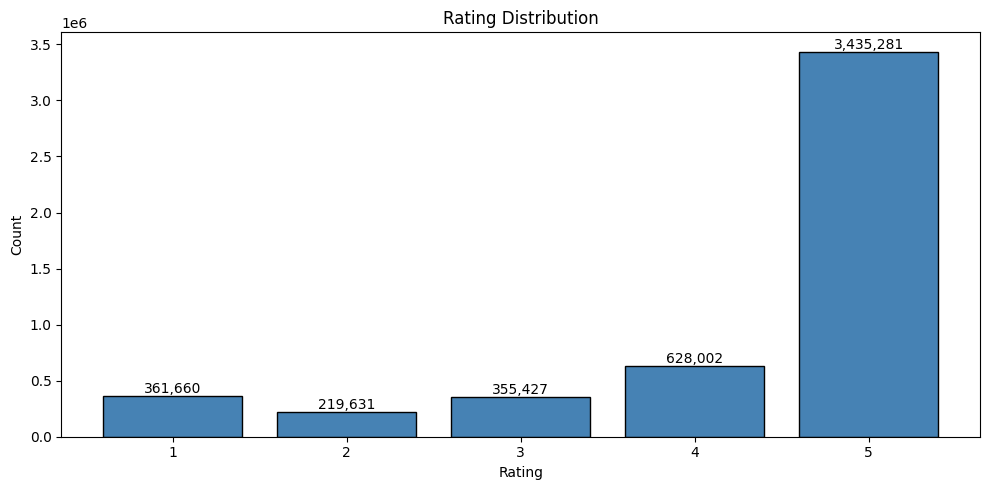

First 100k reviews:
rating
1.0    0.05430
2.0    0.03639
3.0    0.06860
4.0    0.14484
5.0    0.69587
Name: proportion, dtype: float64

Last 100k reviews:
rating
1.0    0.07389
2.0    0.04215
3.0    0.06856
4.0    0.11245
5.0    0.70295
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(10, 5))
rating_counts = df['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
for i, v in zip(rating_counts.index, rating_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


print("First 100k reviews:")
df_early = pd.DataFrame(reviews[:100000])
print(df_early['rating'].value_counts(normalize=True).sort_index())

print("\nLast 100k reviews:")
df_late = pd.DataFrame(reviews[-100000:])
print(df_late['rating'].value_counts(normalize=True).sort_index())